In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://github.com/armandossrecife/lp20231/blob/main/top-500-movies.csv?raw=true'
info = pd.read_csv(url)
info[['production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime']] = info[['production_cost', 'domestic_gross', 'worldwide_gross', 'opening_weekend', 'theaters', 'runtime']].fillna(0)

In [ ]:
#!rm -rf *.csv
#!wget https://github.com/armandossrecife/lp20231/blob/main/top-500-movies.csv

In [ ]:
pathDTs = r"https://raw.githubusercontent.com/armandossrecife/lp20231/refs/heads/main/top-500-movies.csv"
df_filmes = pd.read_csv(pathDTs)

In [ ]:
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             500 non-null    int64  
 1   release_date     499 non-null    object 
 2   title            500 non-null    object 
 3   url              500 non-null    object 
 4   production_cost  500 non-null    int64  
 5   domestic_gross   500 non-null    int64  
 6   worldwide_gross  500 non-null    int64  
 7   opening_weekend  479 non-null    float64
 8   mpaa             492 non-null    object 
 9   genre            495 non-null    object 
 10  theaters         479 non-null    float64
 11  runtime          487 non-null    float64
 12  year             499 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 50.9+ KB


In [ ]:
release_date_null = df_filmes['release_date'].isnull()
title_null = df_filmes['title'].isnull()
url_null = df_filmes['url'].isnull()

In [ ]:
lista_colunas = ['rank', 'release_date', 'title', 'url', 'production_cost', 'domestic_gross', 'worldwide_gross', 'worldwide_gross', 'opening_weekend', 'mpaa', 'genre', 'theaters', 'runtime', 'year' ]

# Questão 1

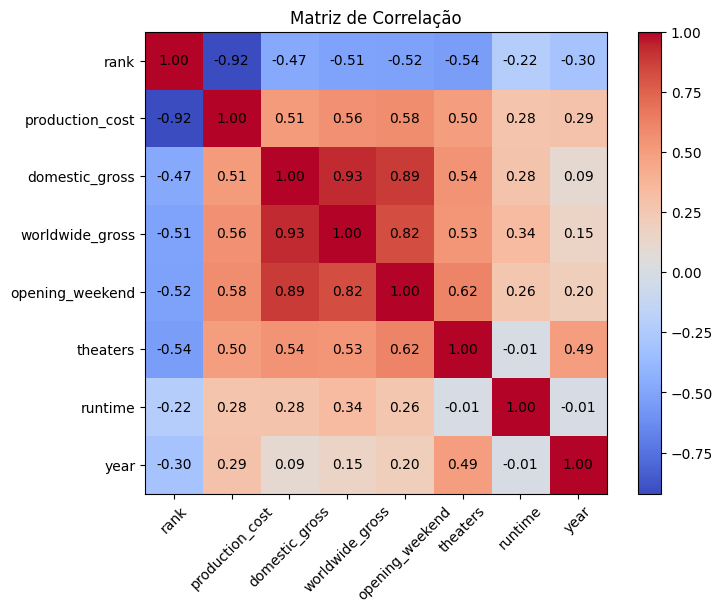

In [ ]:
df_filmes_cleaned = df_filmes.dropna(axis=0)
correlation = df_filmes_cleaned.select_dtypes(include=np.number).corr()
plt.figure(figsize=(8, 6))

plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')

plt.colorbar()

plt.xticks(np.arange(len(correlation.columns)), correlation.columns, rotation=45)

plt.yticks(np.arange(len(correlation.index)), correlation.index)

plt.title('Matriz de Correlação')

for i in range(len(correlation.columns)):
    for j in range(len(correlation.index)):
        plt.text(j, i, f"{correlation.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

## **As colunas com maior correlação são as de:**
### Worldwide_gross (arrecadação bruta total anual) -- Domestic_gross (receita bruta dentro do país de origem) -- **93% de correlação**


### Opening_weekend (total arrecadado durante os 3 primeiros dias de lançamento) -- Domestic_gross -- **89% correlação**


### Opening_weekend -- Worldwide_gross -- **82% correlação**


# Questão 2





## 2.1

In [ ]:
top_20_custo_producao = df_filmes.nlargest(20, 'production_cost')
display(top_20_custo_producao[['title', 'production_cost']].style.set_caption("Top 20 Maiores Custos de Produção"))

,title,production_cost
0,Avengers: Endgame,400000000
1,Pirates of the Caribbean: On Stranger Tides,379000000
2,Avengers: Age of Ultron,365000000
3,Star Wars Ep. VII: The Force Awakens,306000000
4,Avengers: Infinity War,300000000
5,Pirates of the Caribbean: At World’s End,300000000
6,Justice League,300000000
7,Spectre,300000000
8,Mission: Impossible Dead Reckoning Part One,290000000
9,Star Wars: The Rise of Skywalker,275000000


## 2.2



In [ ]:
top_20_arrecadacoes_bilheteria = df_filmes.nlargest(20, 'worldwide_gross')
display(top_20_arrecadacoes_bilheteria[['title', 'worldwide_gross']].style.set_caption("Top 20 Maiores Bilheterias do Mundo"))

,title,worldwide_gross
24,Avatar,2910370905
0,Avengers: Endgame,2797800564
48,Titanic,2207986545
3,Star Wars Ep. VII: The Force Awakens,2064615817
4,Avengers: Infinity War,2048359754
46,Spider-Man: No Way Home,1912775610
37,Jurassic World,1669979967
14,The Lion King,1647778651
29,The Avengers,1515100211
89,Furious 7,1514553486


# Questão 3

## 3.1

In [ ]:
top_20_custo_producao_genero = df_filmes.nlargest(20, 'production_cost')
# Ordenado ?
# Lista so as duas primeiras linhas
#df_carros_marcas.head(2)
# Extrai os valores unicos de uma coluna
print("Os gêneros são:",top_20_custo_producao_genero['genre'].unique())

Os gêneros são: ['Action' 'Adventure' 'Musical']


## 3.2

In [ ]:
top_20_arrecadacoes_bilheteria_genero = df_filmes.nlargest(20, 'worldwide_gross')
print("Os gêneros são:",top_20_arrecadacoes_bilheteria_genero['genre'].unique())

Os gêneros são: ['Action' 'Drama' 'Adventure' 'Musical']


# Questão 4

In [ ]:
top_20_arrecadacoes_bilheteria_genero = df_filmes.nlargest(20, 'worldwide_gross')
media_bilheteria_mundial = top_20_arrecadacoes_bilheteria_genero['worldwide_gross'].mean()
print(f"A média das maiores 20 bilheterias mundiais é: $ {media_bilheteria_mundial:,.2f}")

A média das maiores 20 bilheterias mundiais é: $ 1,683,804,948.85


# Questão 5

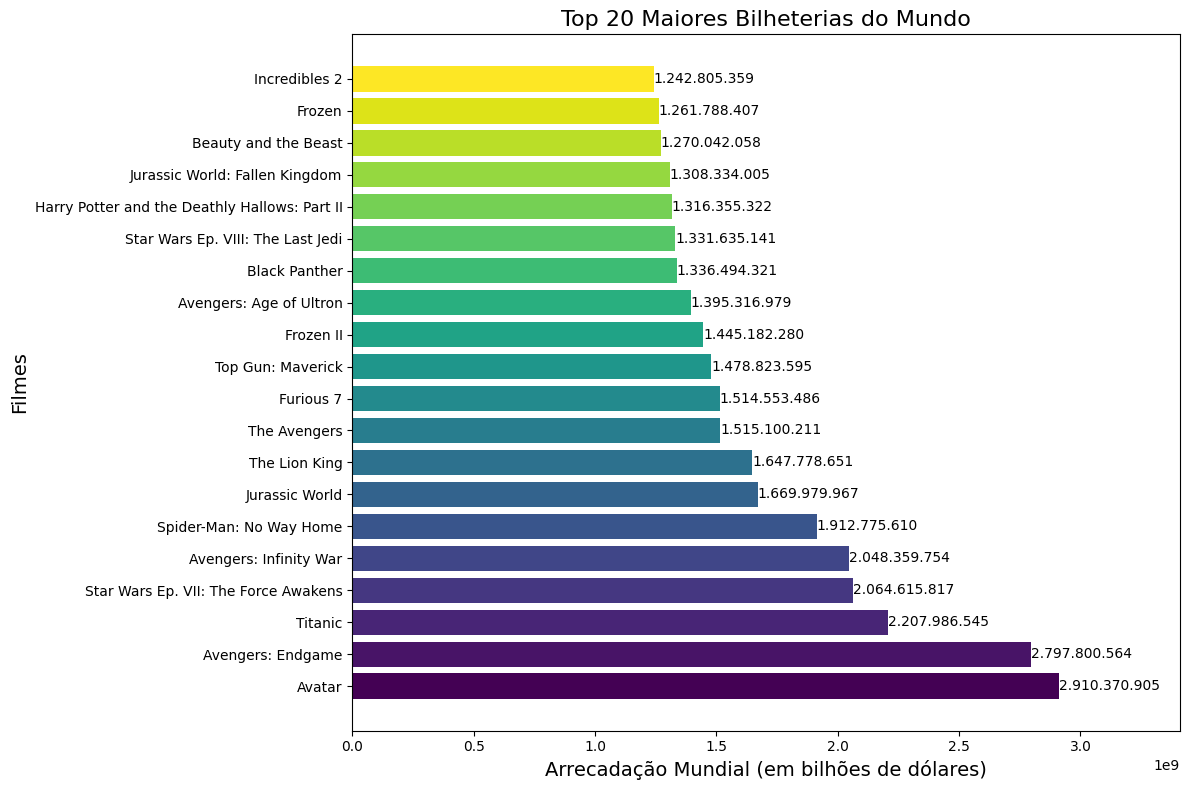

In [ ]:

top_20_arrecadacoes_bilheteria = df_filmes.nlargest(20, 'worldwide_gross')

# criar o gráfico de barras horizontal
plt.figure(figsize=(12, 8))

# gerar cores para as barras
colors = plt.cm.viridis(np.linspace(0, 1, len(top_20_arrecadacoes_bilheteria)))

# criar as barras horizontais
bars = plt.barh(top_20_arrecadacoes_bilheteria['title'],
                top_20_arrecadacoes_bilheteria['worldwide_gross'],
                color=colors)

# adicionar título e rótulos
plt.title('Top 20 Maiores Bilheterias do Mundo', fontsize=16)
plt.xlabel('Arrecadação Mundial (em bilhões de dólares)', fontsize=14)
plt.ylabel('Filmes', fontsize=14)

# adicionar valores no final de cada barra com o valor completo em bilhões
for bar in bars:
    xval = bar.get_width()
    # formatar o valor com pontos como separadores de milhar
    formatted_value = f"{xval:,.0f}".replace(',', '.')
    plt.text(xval, bar.get_y() + bar.get_height() / 2, formatted_value,
             ha='left', va='center', fontsize=10)

# aumentar o limite do eixo x em 500 mi
plt.xlim(right=top_20_arrecadacoes_bilheteria['worldwide_gross'].max() + 500_000_000)

# exibir o gráfico
plt.tight_layout()
plt.show()

# Questão 6

In [ ]:
bilheteria_total = top_20_arrecadacoes_bilheteria['worldwide_gross'].sum()
porcentagem_de_cada = (top_20_arrecadacoes_bilheteria['worldwide_gross'] / bilheteria_total) * 100

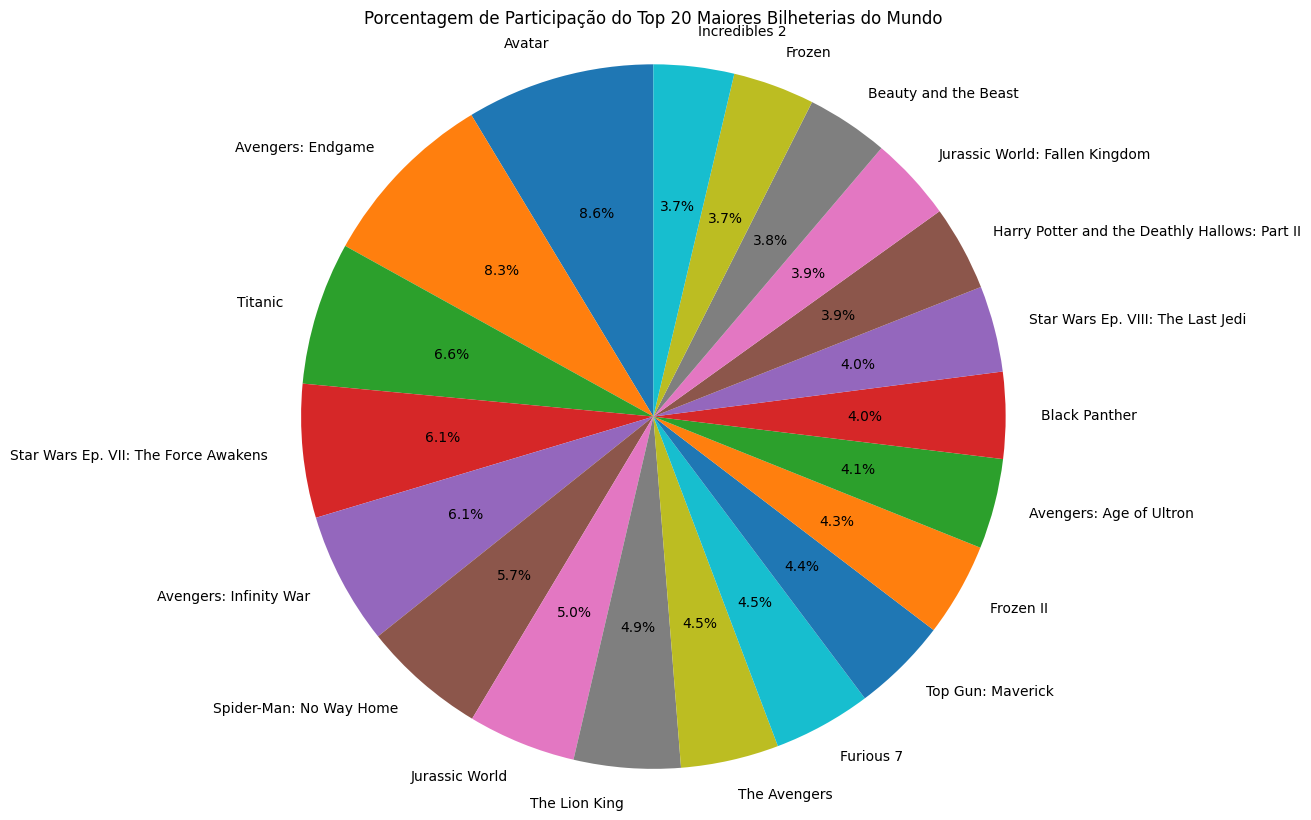

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(porcentagem_de_cada, labels=top_20_arrecadacoes_bilheteria['title'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentagem de Participação do Top 20 Maiores Bilheterias do Mundo')
plt.axis('equal')
plt.show()

# Questão 7

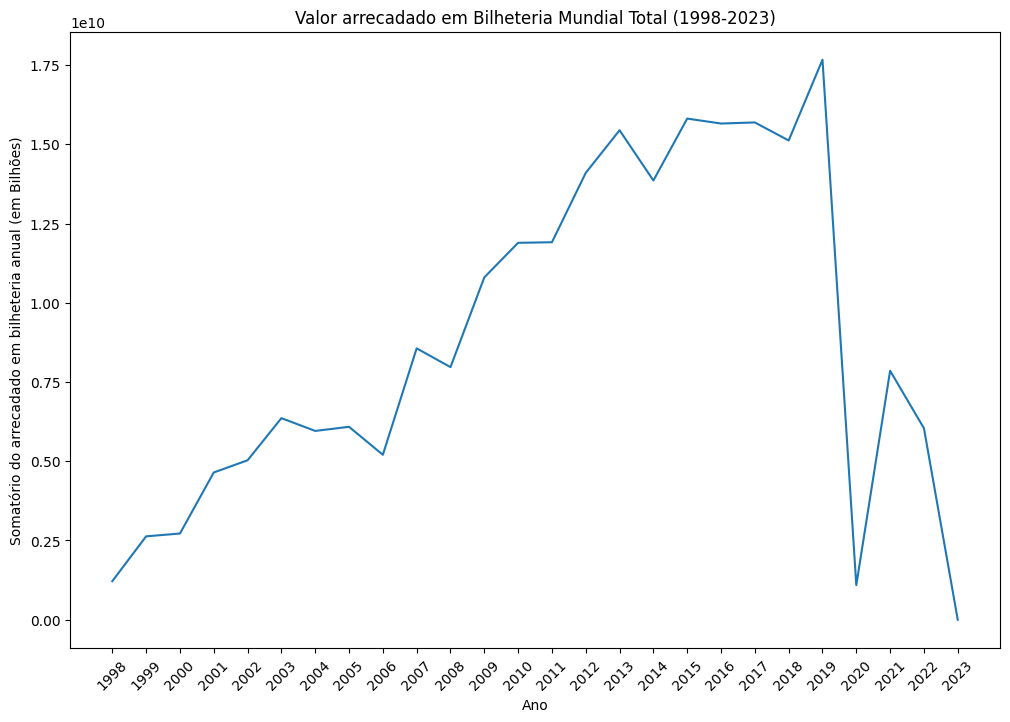

In [ ]:
a = int(df_filmes['year'].max())#2023
somas = []
for year in range (1998, a + 1):
  b = int(df_filmes[df_filmes['year'] == year]['worldwide_gross'].sum())
  somas.append(b)

eixo_x = np.linspace(1998, 2023, 2023 - 1998 + 1)
eixo_y = somas

plt.figure(figsize=(12, 8))

plt.title('Valor arrecadado em Bilheteria Mundial Total (1998-2023)')
plt.xlabel('Ano')
plt.ylabel('Somatório do arrecadado em bilheteria anual (em Bilhões)')
plt.xticks(np.arange(1998, 2024, 1),rotation=45)

plt.plot(eixo_x,eixo_y)
plt.show()

#Questão 8

In [ ]:
filmes_acao = info[info['genre'].str.contains('Action', case=False, na=False)]
filmes_acao_ordenados = filmes_acao.sort_values(by='worldwide_gross', ascending=False)
filmes_acao_top20 = filmes_acao_ordenados.head(20)
media_arrecadacao = filmes_acao_top20['worldwide_gross'].mean()
print(f'A média de arrecadação dos 20 filmes de ação com maior bilheteria mundial foi: ${media_arrecadacao:,.2f} dólares')

A média de arrecadação dos 20 filmes de ação com maior bilheteria mundial foi: $1,511,815,901.90 dólares


# Questão 9



- Qual é a média de custo de produção dos 20 filmes de aventura com maior bilheteria mundial?

In [ ]:
filmes_aventura = info[info['genre'].str.contains('Adventure', case=False, na=False)]
filmes_aventura_ordenados = filmes_aventura.sort_values(by='worldwide_gross', ascending=False)
filmes_aventura_top20 = filmes_aventura_ordenados.head(20)
media_custo_producao = filmes_aventura_top20['production_cost'].mean()
print(f'A média do custo de produção dos 20 filmes de aventura com maior bilheteria mundial foi: ${media_custo_producao:,.2f} dólares')

A média do custo de produção dos 20 filmes de aventura com maior bilheteria mundial foi: $202,400,000.00 dólares


#Questão 10

- Crie um gráfico que agrupe os filmes por gênero e mostre o percentual de participação da bilheteria mundial de todos os filmes do dataset por gênero.


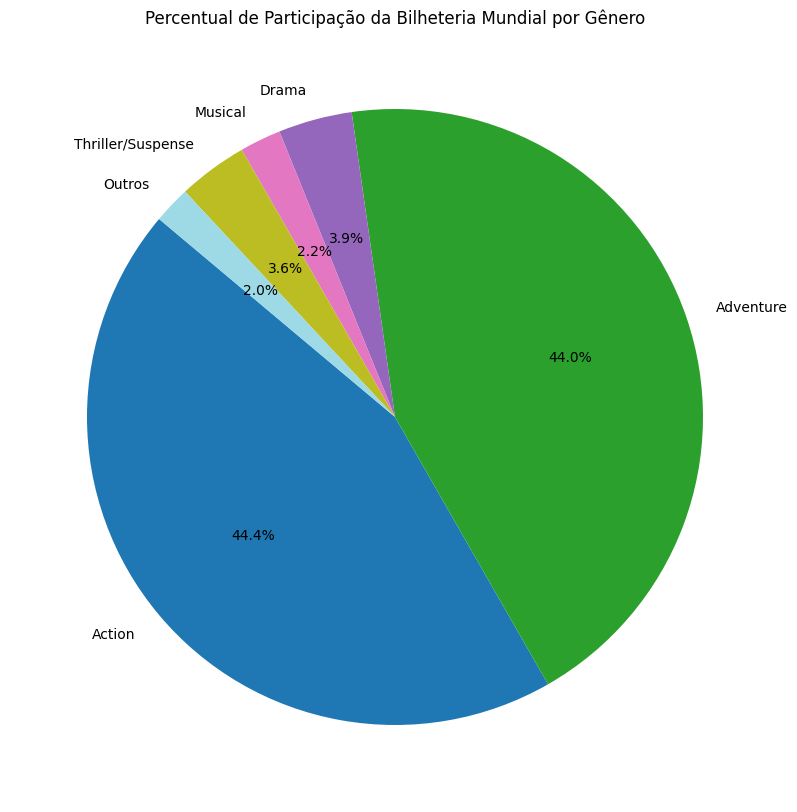

In [ ]:
info['genre'] = info['genre'].str.split(',')
info = info.explode('genre')
info['genre'] = info['genre'].str.strip()
arrecadacao_por_genero = info.groupby('genre')['worldwide_gross'].sum()
percentual_por_genero = (arrecadacao_por_genero / arrecadacao_por_genero.sum()) * 100

limite = 2
generos_agrupados = percentual_por_genero[percentual_por_genero >= limite]
outros_generos = percentual_por_genero[percentual_por_genero < limite].sum()
generos_agrupados['Outros'] = outros_generos

plt.figure(figsize=(13, 10))
generos_agrupados.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab20')
plt.title('Percentual de Participação da Bilheteria Mundial por Gênero')
plt.ylabel('')
plt.show()